### Objective

* Is the tweet about the disaster?
* Does the tweet offer support for the victims of the disaster?
* Does the tweet express any emotion to the victim of the disaster?

#### Import Necessary Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

sns.set_style("darkgrid")
%matplotlib inline

import openpyxl

import nltk
from nltk.corpus import words
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.util import ngrams
from nltk import word_tokenize
# nltk.download()
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud, STOPWORDS



from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harry\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Convert the dataset to csv

In [2]:
harvei = '\\Users\\harry\\Desktop\\Data_Science_BootCamp\\Data_science\\Projects\\NLP\\data\\hurricane_harvey_final_data.tsv'

In [3]:
harvey = pd.read_table(harvei, sep = '\t')

In [4]:
harvey.to_csv('harvey.csv', index=False)

In [5]:
#harvey.head(2)

In [6]:
cal = "\\Users\\harry\\Desktop\\Data_Science_BootCamp\\Data_science\\Projects\\NLP\\data\\california_wildfires_final_data.tsv"

In [7]:
cali = pd.read_table(cal, sep = '\t')

In [8]:
cali.to_csv('cali.csv', index=False)

In [9]:
#cali.head(2)

In [10]:
cali.shape

(1589, 15)

In [11]:
irmi = '\\Users\\harry\\Desktop\\Data_Science_BootCamp\\Data_science\\Projects\\NLP\\data\\hurricane_irma_final_data.tsv'

In [12]:
irma = pd.read_table(irmi, sep = '\t')

In [13]:
irma.to_csv('irma.csv', index=False)

In [14]:
#irma.head(2)

In [15]:
mari = '\\Users\\harry\\Desktop\\Data_Science_BootCamp\\Data_science\\Projects\\NLP\\data\\hurricane_maria_final_data.tsv'

In [16]:
maria = pd.read_table(mari, sep = '\t')

In [17]:
maria.to_csv("maria.csv", index=False)

In [18]:
#maria.head(2)

In [19]:
irai = '\\Users\\harry\\Desktop\\Data_Science_BootCamp\\Data_science\\Projects\\NLP\\data\\iraq_iran_earthquake_final_data.tsv'

In [20]:
iraq = pd.read_table(irai, sep = '\t')

In [21]:
iraq.to_csv("iraq.csv", index=False)

In [22]:
#iraq.head(2)

In [23]:
mexi = '\\Users\\harry\\Desktop\\Data_Science_BootCamp\\Data_science\\Projects\\NLP\\data\\mexico_earthquake_final_data.tsv'

In [24]:
mexico = pd.read_table(mexi, sep = '\t')

In [25]:
mexico.to_csv("mexico.csv", index=False)

In [26]:
#mexico.head(2)

In [27]:
sk = '\\Users\\harry\\Desktop\\Data_Science_BootCamp\\Data_science\\Projects\\NLP\\data\\srilanka_floods_final_data.tsv'

In [28]:
sri = pd.read_table(sk, sep = '\t')

In [29]:
sri.to_csv("sri.csv", index=False)

In [30]:
#sri.head(2)

#### Combine all data

In [31]:
# use concat instead of merge cos all data have the same column 
df = pd.concat([cali, harvey, iraq, irma, maria, mexico, sri],
                ignore_index = True,
                sort = False)

In [32]:
df.head(2)

,tweet_id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,image_damage,image_damage_conf,tweet_text,image_url,image_path
0,917791044158185473,917791044158185473_0,informative,1.0,informative,0.6766,other_relevant_information,1.0,other_relevant_information,0.6766,NaN,NaN,RT @Gizmodo: Wildfires raging through Northern...,http://pbs.twimg.com/media/DLyi_WYVYAApwNg.jpg,data_image/california_wildfires/10_10_2017/917...
1,917791130590183424,917791130590183424_0,informative,1.0,informative,0.6667,infrastructure_and_utility_damage,1.0,affected_individuals,0.6667,NaN,NaN,PHOTOS: Deadly wildfires rage in California ht...,http://pbs.twimg.com/media/DLymKm9UMAAu0qw.jpg,data_image/california_wildfires/10_10_2017/917...


In [33]:
# Check the column names
df.columns.values.tolist()

['tweet_id',
 'image_id',
 'text_info',
 'text_info_conf',
 'image_info',
 'image_info_conf',
 'text_human',
 'text_human_conf',
 'image_human',
 'image_human_conf',
 'image_damage',
 'image_damage_conf',
 'tweet_text',
 'image_url',
 'image_path']

In [34]:
df.shape

(18082, 15)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18082 entries, 0 to 18081
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           18082 non-null  int64  
 1   image_id           18082 non-null  object 
 2   text_info          18082 non-null  object 
 3   text_info_conf     18082 non-null  float64
 4   image_info         18082 non-null  object 
 5   image_info_conf    18082 non-null  float64
 6   text_human         18082 non-null  object 
 7   text_human_conf    18082 non-null  float64
 8   image_human        18082 non-null  object 
 9   image_human_conf   18082 non-null  float64
 10  image_damage       3627 non-null   object 
 11  image_damage_conf  3627 non-null   float64
 12  tweet_text         18082 non-null  object 
 13  image_url          18082 non-null  object 
 14  image_path         18082 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 2.1+ MB


In [36]:
df.dtypes

tweet_id               int64
image_id              object
text_info             object
text_info_conf       float64
image_info            object
image_info_conf      float64
text_human            object
text_human_conf      float64
image_human           object
image_human_conf     float64
image_damage          object
image_damage_conf    float64
tweet_text            object
image_url             object
image_path            object
dtype: object

In [37]:
df.isnull().sum()

tweet_id                 0
image_id                 0
text_info                0
text_info_conf           0
image_info               0
image_info_conf          0
text_human               0
text_human_conf          0
image_human              0
image_human_conf         0
image_damage         14455
image_damage_conf    14455
tweet_text               0
image_url                0
image_path               0
dtype: int64

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,18082.0,9.105572e+17,1.129871e+16,8.699189e+17,9.069342e+17,9.101265e+17,9.160276e+17,9.320276e+17
text_info_conf,18082.0,8.003146e-01,2.005088e-01,2.578000e-01,6.614000e-01,7.119000e-01,1.000000e+00,1.000000e+00
image_info_conf,18082.0,8.569490e-01,1.909750e-01,2.684000e-01,6.734000e-01,1.000000e+00,1.000000e+00,1.000000e+00
text_human_conf,18082.0,8.003146e-01,2.005088e-01,2.578000e-01,6.614000e-01,7.119000e-01,1.000000e+00,1.000000e+00
image_human_conf,18082.0,8.569490e-01,1.909750e-01,2.684000e-01,6.734000e-01,1.000000e+00,1.000000e+00,1.000000e+00
image_damage_conf,3627.0,7.890148e-01,2.059917e-01,2.752000e-01,6.606000e-01,7.027000e-01,1.000000e+00,1.000000e+00


#### Data Cleaning

In [39]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [40]:
# function taken and modified 
# from https://stackoverflow.com/questions/54396405/how-can-i-preprocess-nlp-text-lowercase-remove-special-characters-remove-numb

def preprocess(sentence):
    #convert to strings series
    sentence=str(sentence)
    # lowercase everything
    sentence = sentence.lower()
    # remove html links and tags.
    # sentence=sentence.replace('{html}',"") 
    sentence = sentence.encode('ascii', 'ignore').decode()
    sentence = re.sub(r'https*\S+', ' ', sentence)
    sentence = re.sub(r'http*\S+', ' ', sentence)
    
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    
    #remove unicode characters
    rem_url=re.sub(r'http\S+', '',cleantext)
    # replace the numbers with space
    rem_num = re.sub('[0-9]+', '', rem_url)
    
    #Regexp Tokenizer. Tokenise words while ignoring  punctuation.
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    
#     kens = nltk.word_tokenize(sentence)
#     sentence = nltk.Text(kens)
#     text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\â-]", word)) for word in sentence]
    
    # remove stopwords if word is greater than 2
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    
    # Stemming the words
    stem_words=[stemmer.stem(w) for w in filtered_words]
    
    # Lemmatization
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    
    return " ".join(filtered_words)


df['cleanText']=df['tweet_text'].map(lambda s:preprocess(s)) 

In [41]:
# function taken and modified 
# from https://towardsdatascience.com/cleaning-text-data-with-python-b69b47b97b76

# def text_preproc(x):
#   # first we lowercase everything
#     x = x.lower()
#     x = ' '.join([word for word in x.split(' ') if len(word) >2 if not x in stoplist])
#     # remove unicode characters
#     x = x.encode('ascii', 'ignore').decode()
#     x = re.sub(r'https*\S+', ' ', x)
#     x = re.sub(r'http*\S+', ' ', x)
#     # then use regex to remove @ symbols and hashtags
#     x = re.sub(r'@\S', '', x)
#     x = re.sub(r'#\S+', ' ', x)
#     x = re.sub(r'\'\w+', '', x)
#     x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
#     x = re.sub(r'\w*\d+\w*', '', x)
#     x = re.sub(r'\s{2,}', ' ', x)
#     x = re.sub(r'\s[^\w\s]\s', '', x)
#     # remove single letters and numbers surrounded by space
#     x = re.sub(r'\s[a-z]\s|\s[0-9]\s', ' ', x)
#     return x
# df['clean_text'] = df.tweet_text.apply(text_preproc)

In [42]:
df['tweet_text'].unique()

array(['RT @Gizmodo: Wildfires raging through Northern California are terrifying https://t.co/dI73RFzX2i https://t.co/k4KnvIimsU',
       'PHOTOS: Deadly wildfires rage in California https://t.co/td9xT3vXOL https://t.co/OimwAncLew',
       'RT @Cal_OES: PLS SHARE: Weâ€™re capturing wildfire response, recovery info here: https://t.co/r89LKpjLPj https://t.co/HiA1oQF2Ax',
       ...,
       "@PaulMalignaggi Lol What u on about, Sergio Mora didn't have Horn winning https://t.co/OLvjcqEmLe",
       '#Cameroon : 4 #female suicide #Bombers kill 1 in Mora. https://t.co/XuBHLQXWVk https://t.co/AtDaoyO433',
       'RT @saakey6251413: it happened during the visit of #CycloneMora on Bangladesh https://t.co/dw53n4O5Ve'],
      dtype=object)

In [43]:
# df['clean_text'].unique()

In [44]:
df['cleanText'].unique()

array(['gizmodo wildfires raging northern california terrifying',
       'photos deadly wildfires rage california',
       'cal_oes pls share capturing wildfire response recovery info', ...,
       'paulmalignaggi lol sergio mora horn winning',
       'cameroon female suicide bombers kill mora',
       'saakey happened visit cyclonemora bangladesh'], dtype=object)

In [45]:
df.head(2)

,tweet_id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,image_damage,image_damage_conf,tweet_text,image_url,image_path,cleanText
0,917791044158185473,917791044158185473_0,informative,1.0,informative,0.6766,other_relevant_information,1.0,other_relevant_information,0.6766,NaN,NaN,RT @Gizmodo: Wildfires raging through Northern...,http://pbs.twimg.com/media/DLyi_WYVYAApwNg.jpg,data_image/california_wildfires/10_10_2017/917...,gizmodo wildfires raging northern california t...
1,917791130590183424,917791130590183424_0,informative,1.0,informative,0.6667,infrastructure_and_utility_damage,1.0,affected_individuals,0.6667,NaN,NaN,PHOTOS: Deadly wildfires rage in California ht...,http://pbs.twimg.com/media/DLymKm9UMAAu0qw.jpg,data_image/california_wildfires/10_10_2017/917...,photos deadly wildfires rage california


#### EDA

**Word count for the raw data**

In [46]:
def length(string):
    return len(string)
df['length'] = df['tweet_text'].apply(length)

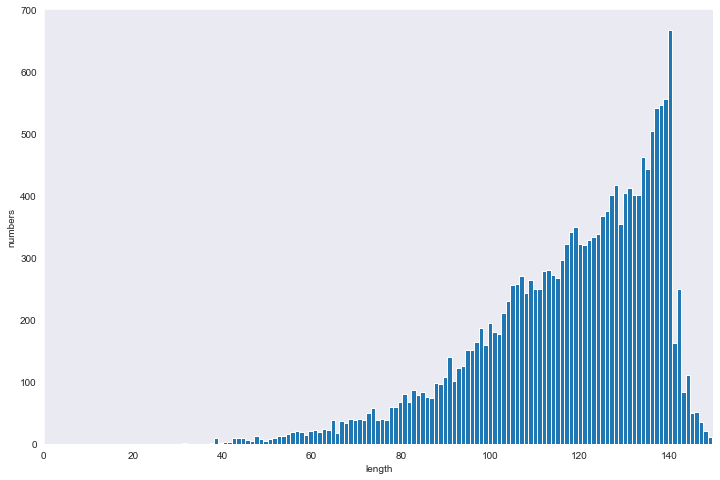

In [47]:
plt.figure(figsize=(12,8))
bins = 150
plt.hist(df['length'], bins=bins)
plt.xlabel('length')
plt.ylabel('numbers')
# plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show();

**Word Frequent for clean data**

In [48]:
def clean_length(string):
    return len(string)
df['clean_length'] = df['cleanText'].apply(length)

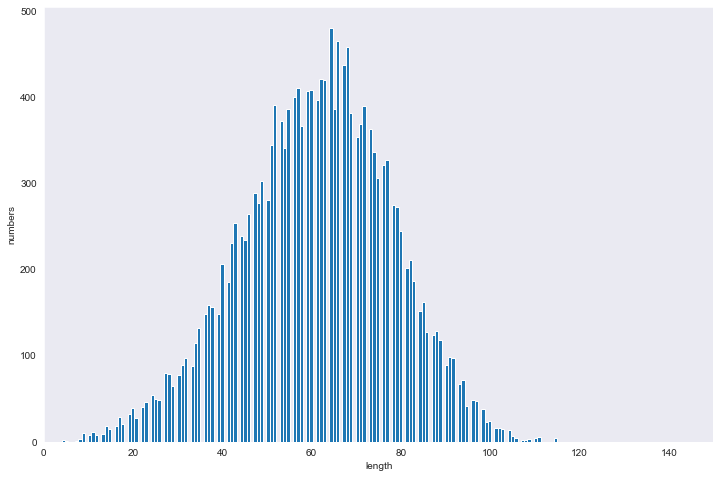

In [49]:
plt.figure(figsize=(12,8))
bins = 150
plt.hist(df['clean_length'], bins=bins)
plt.xlabel('length')
plt.ylabel('numbers')
# plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show();

**Word Frequent**

In [50]:
# function taken and modified 
# from https://www.kaggle.com/code/lucianfox/disaster-tweets-embeddings-ann

def word_freq_func(corpus):
    """
    This function calculates frequency of unique tokens in the corpus
    Input   : corpus :<str> entire corpus of text
    
    Returns : word_freq_df <pandas.dataframe> 
    """
    word_freq = dict()
    for token in corpus.split():
        if token not in word_freq.keys():
            word_freq[token]=1
        else:
            word_freq[token]+= 1
        
    word_freq_df = pd.DataFrame({'words':word_freq.keys(),'values':word_freq.values()})
    word_freq_df = word_freq_df.sort_values(by='values',ascending=False)
    
    return word_freq_df

**Word Frequent for raw data**

In [51]:
corpus_list = df['tweet_text'].tolist()
corpus = " ".join(corpus_list)
vocab = list(set(corpus.split()))

In [52]:
word_freq_df = word_freq_func(corpus)

In [53]:
freq_df = word_freq_df.head(10)
freq_df

,words,values
113,to,4758
15,in,4015
8164,Hurricane,3331
172,the,3315
166,of,3307
0,RT,2705
134,for,2627
5072,Puerto,2396
100,and,2284
1577,Harvey,2183


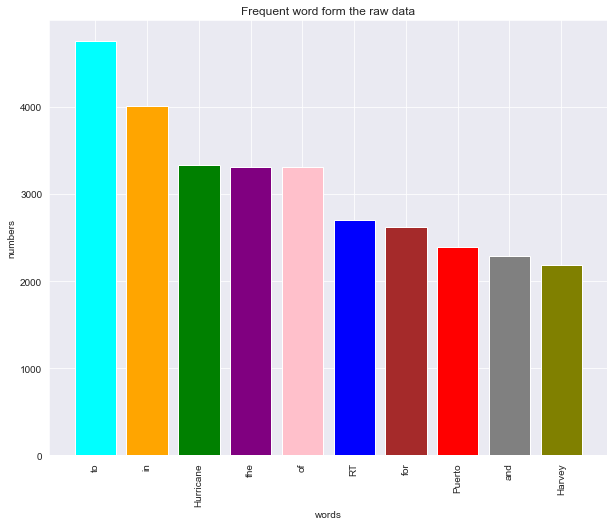

In [54]:
#visualization

plt.figure(figsize=(10,8))
color_list = ['Cyan', 'Orange', 'Green', 'Purple', 'Pink', 'Blue', 'Brown', 'Red', 'Grey', 'Olive' ]
graph = plt.bar(freq_df['words'], freq_df['values'], color = color_list)
plt.xticks(rotation=90, fontsize=10);
plt.title("Frequent word form the raw data")
plt.xlabel("words")
plt.ylabel("numbers");

**Word Frequent for clean data**

In [55]:
corpus_list = df['cleanText'].tolist()
corpus = " ".join(corpus_list)
vocab = list(set(corpus.split()))

In [56]:
word_freq_clean_df = word_freq_func(corpus)

In [57]:
clean_tweet = word_freq_clean_df.head(10)
clean_tweet

,words,values
4931,irma,4661
1134,hurricane,4149
785,harvey,3738
2268,puerto,2504
2269,rico,2379
10310,maria,1814
2088,earthquake,1681
4,california,1366
2001,mexico,1188
90,help,978


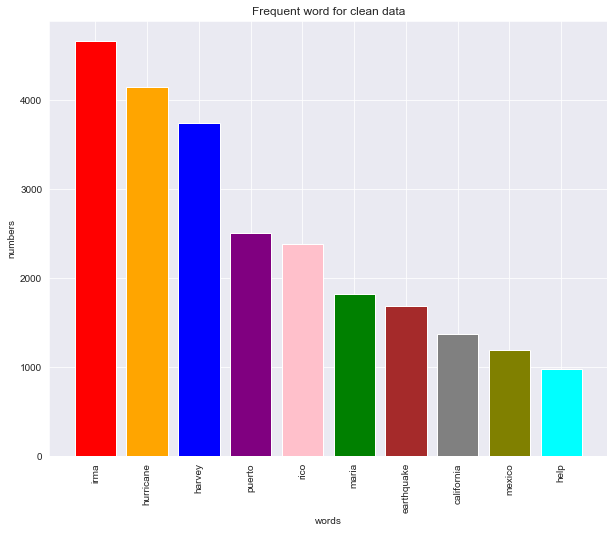

In [58]:
# visualization
plt.figure(figsize=(10,8))
color_list = ['Red', 'Orange', 'Blue', 'Purple', 'Pink', 'Green', 'Brown', 'Grey', 'Olive', 'Cyan']
graph = plt.bar(clean_tweet['words'], clean_tweet['values'], color = color_list)
plt.xticks(rotation=90, fontsize=10);
plt.title("Frequent word for clean data")
plt.xlabel("words")
plt.ylabel("numbers");

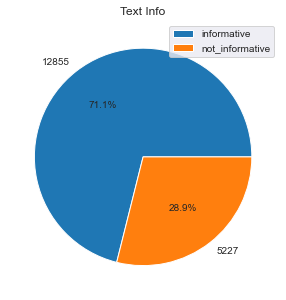

In [59]:
text = df['text_info'].value_counts()
text

plt.figure(figsize=(5,5))
plt.pie(text, labels = text, autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Text Info')
plt.legend(labels=text.index);

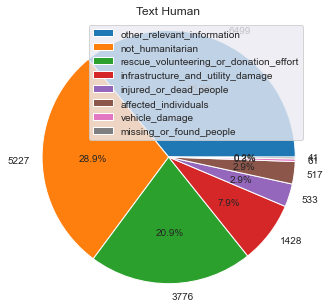

In [60]:
human = df['text_human'].value_counts()
human

plt.figure(figsize=(5,5))
plt.pie(human, labels = human, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Text Human')
plt.legend(labels=human.index);

In [61]:
df[:2]

,tweet_id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,image_damage,image_damage_conf,tweet_text,image_url,image_path,cleanText,length,clean_length
0,917791044158185473,917791044158185473_0,informative,1.0,informative,0.6766,other_relevant_information,1.0,other_relevant_information,0.6766,NaN,NaN,RT @Gizmodo: Wildfires raging through Northern...,http://pbs.twimg.com/media/DLyi_WYVYAApwNg.jpg,data_image/california_wildfires/10_10_2017/917...,gizmodo wildfires raging northern california t...,120,55
1,917791130590183424,917791130590183424_0,informative,1.0,informative,0.6667,infrastructure_and_utility_damage,1.0,affected_individuals,0.6667,NaN,NaN,PHOTOS: Deadly wildfires rage in California ht...,http://pbs.twimg.com/media/DLymKm9UMAAu0qw.jpg,data_image/california_wildfires/10_10_2017/917...,photos deadly wildfires rage california,91,39


**Word Cloud**

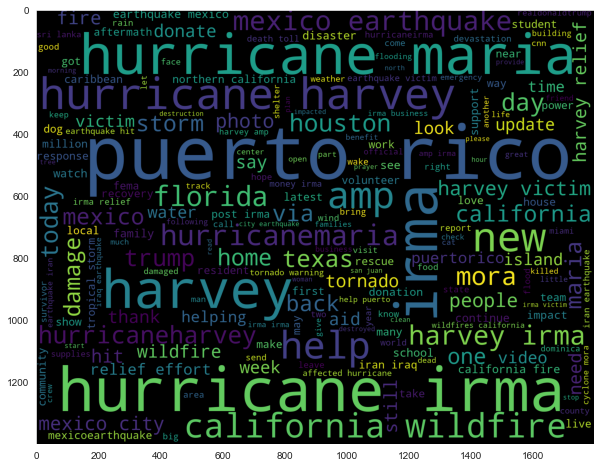

In [62]:
plt.figure(figsize=(10,8))

wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(' '.join(df['cleanText']))
plt.grid(None)
plt.imshow(wordcloud_ip);

**Vactorization**

In [63]:
# # TfidVectorizer instance
# vec = TfidfVectorizer(analyzer=preprocess)

# #transform into a feature matrix
# xp = vec.fit_transform(df['cleanText'])
# # X = vec.fit_transform(df['cleanText'])

# # X = pd.DataFrame.sparse.from_spmartrix(X)
# xp = pd.SparseDataFrame()


# # xp = pd.DataFrame.sparse.from_spmartrix(X)

In [64]:
# vectorizer = TfidfVectorizer(analyzer=preprocess)

In [65]:
# print(vectorizer.fit_transform(df['cleanText']).todense())

In [66]:
# X = pd.DataFrame(vectorizer.fit_transform(df['cleanText']).todense())
# X.columns = sorted(vectorizer.vocabulary_)
# X.head(1)

In [67]:
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform(df['cleanText'])

pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).head(5)

,abandoned,abc,abchouston,abcnews,able,absolutely,academy,access,according,account,...,yard,year,year old,years,yes,yesterday,york,young,youre,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### K-Means Clustering

In [68]:
# code was taken and modified 
# from https://towardsdatascience.com/text-clustering-using-k-means-ec19768aae48


# Using PCA to remove cols which has less co-relation
sklearn_pca = PCA(n_components = 2) 

#fit_transform() is used to scale training data to learn parameters such as 
# mean & variance of the features of training set and then these parameters are used to scale our testing data.
# As concluded using Elbow Method.
Y_sklearn = sklearn_pca.fit_transform(X.toarray())


k_clusters = 4


# Partition 'n' no. of observations into 'k' no. of clusters. 
kmeans = KMeans(n_clusters= k_clusters, max_iter=600, algorithm = 'lloyd')

# Fitting k-means model  to feature array
fitted = kmeans.fit(Y_sklearn) 

# predicting clusters class '0' or '1' corresponding to 'n' no. of observations
prediction = kmeans.predict(Y_sklearn) 

**Elbow Method**

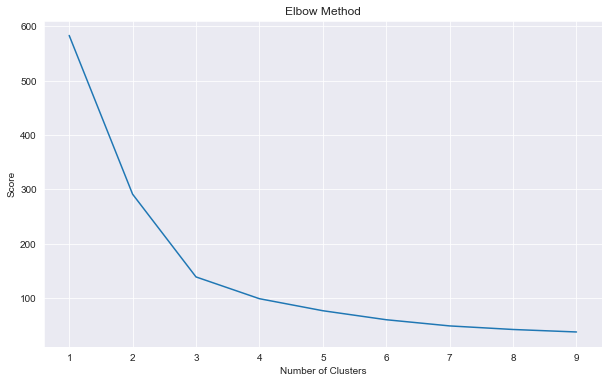

In [69]:
# used to get the number of clusters

# code was taken and modified 
# from https://towardsdatascience.com/text-clustering-using-k-means-ec19768aae48

def elbow_method(Y_sklearn):
    """
    This is the function used to get optimal number of clusters in order to feed to the k-means clustering algorithm.
    """
    # Range of possible clusters that can be generated
    number_clusters = range(1, 10)
    
    # Getting no. of clusters 
    kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters] 
    
    # Getting score corresponding to each cluster.
    score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))] 
    
    # Getting list of positive scores.
    score = [i*-1 for i in score] 
    
    plt.plot(number_clusters, score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Method')
    plt.show();
    
plt.figure(figsize=(10,6))
elbow_method(Y_sklearn)

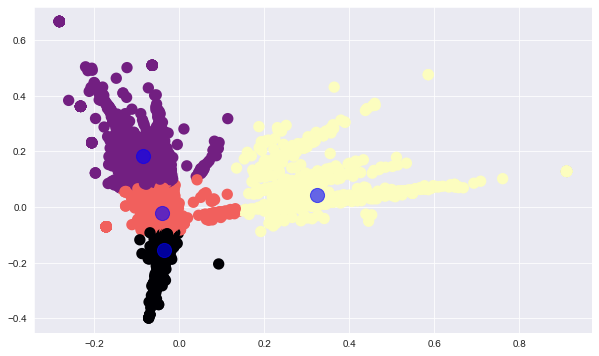

In [70]:
# code was taken and modified 
# from https://towardsdatascience.com/text-clustering-using-k-means-ec19768aae48

def kmeans_clustering(Y_sklearn, fitted):
    """
    This function will predict clusters on training set and plot the visuals of clusters as well.
    """
    
    # Plotting scatter plot 
    plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=40, cmap='magma', linewidth = 5) 
    
    # It will give best possible coordinates of cluster center after fitting k-means
    centers = fitted.cluster_centers_ 
    
    plt.scatter(centers[:, 0], centers[:, 1],c='blue', s=200, alpha=0.6);
    
    # As this can be seen from the figure, there is an outlier as well.
plt.figure(figsize=(10,6))
# plt.legend()
kmeans_clustering(Y_sklearn, fitted)

In [71]:
model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=42)
model.fit(X)

KMeans(max_iter=600, n_clusters=4, random_state=42, tol=1e-06)

In [72]:
# clusters = model.predict(X)

In [73]:
# df["ClusterName"] = clusters
# df.head(60)

#### SVM Classification